In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter

In [ ]:
img = cv2.imread("elephant.jpg")

Fourier transform (need to underestand intuition behind code [2d DFT])

In [107]:
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [108]:
img1.shape

(512, 512)

In [109]:
def producing_coordinates(M, N):
    x_coords, y_coords = np.meshgrid(np.arange(N), np.arange(M))

    x_list = x_coords.flatten().tolist()
    y_list = y_coords.flatten().tolist()
    return x_list, y_list

In [110]:
x, y = producing_coordinates(3, 4)
print(x)
print(y)

[0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]
[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2]


In [111]:
def fourier_exponent(kx, ky, M, N, x, y):
    brackets = x * kx/M + y * ky/N
    real = np.cos(-2* np.pi * brackets)
    imaginary = np.sin(-2 * np.pi * brackets)
    return real, imaginary

In [116]:


fourier_transform = []

img_as_np = np.array(img1)
x, y = producing_coordinates(img1.shape[0], img1.shape[1])
x = np.array(x)
y = np.array(y)

M = img1.shape[0]
N = img1.shape[1]

real_frequency = []
imaginary_frequency = []
img_flatten = img_as_np.flatten()
i = 0
for kx in range(0, M):
    for ky in range(0 , N):
        real, imaginary = fourier_exponent(kx, ky, M, N, x, y)
        real *= img_flatten
        imaginary *= img_flatten
        real_frequency.append(sum(real) * 1/(M*N))
        imaginary_frequency.append(sum(imaginary) * 1/(M*N))
    i += 1
    print(i)



KeyboardInterrupt: 

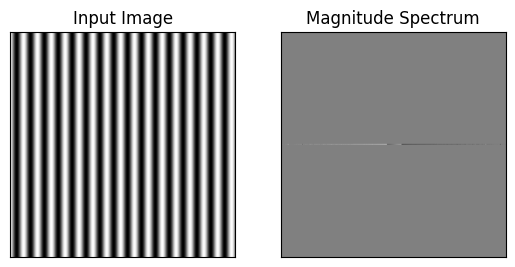

In [114]:
img_as_np = np.array(img1)
M, N = img_as_np.shape

#img_as_np = img_as_np/255

# Compute FFT and shift
H = np.fft.fft2(img_as_np) / (M * N)
H_shifted = np.fft.fftshift(H)


# Compute and plot phase
phase = np.angle(H_shifted)
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(phase, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

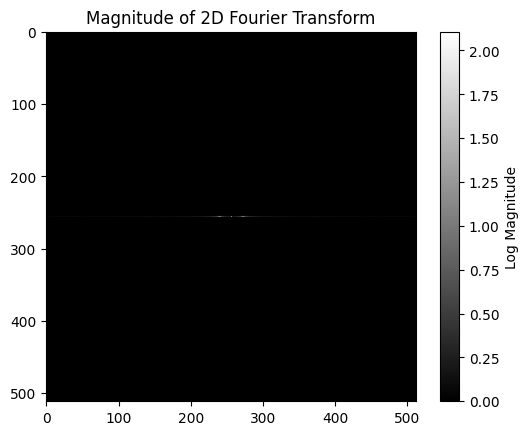

In [115]:
magnitude = np.abs(H_shifted)

# Plot the magnitude (often using a logarithmic scale for better visualization)
plt.imshow(np.log10(magnitude + 1), cmap='gray')  # +1 to avoid log(0)
plt.colorbar(label='Log Magnitude')
plt.title('Magnitude of 2D Fourier Transform')
plt.show()

In [80]:
img1.shape

(148, 220)

In [ ]:
real_npy = np.array(real_frequency)
img_npy = np.array(imaginary_frequency)
real_npy = real_npy.reshape((M, N))
img_npy = img_npy.reshape((M, N))

In [86]:
real_npy = np.fft.fftshift(real_npy)
img_npy = np.fft.fftshift(img_npy)
phase = np.arctan2(img_npy, real_npy)

In [88]:
kx = np.array([i for i in range(0, M)])
ky = np.array([i for i in range(0, N)])

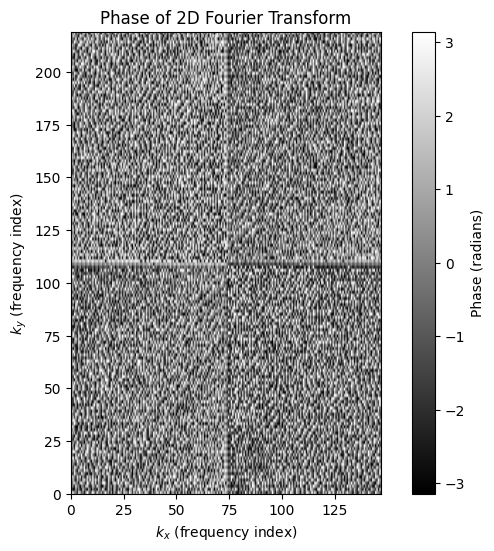

In [89]:
plt.figure(figsize=(8, 6))
plt.imshow(phase, cmap='gray', extent=[kx.min(), kx.max(), ky.min(), ky.max()])
plt.colorbar(label='Phase (radians)')
plt.xlabel('$k_x$ (frequency index)')
plt.ylabel('$k_y$ (frequency index)')
plt.title('Phase of 2D Fourier Transform')
plt.show()

In [90]:
#magnitudes
points = np.sqrt(real_npy ** 2 + img_npy ** 2)

In [60]:
points

array([[1.54067313e-16, 2.88926257e-16, 7.52006351e-17, ...,
        9.23770519e-17, 6.95221536e-17, 1.03780383e-16],
       [5.85560477e-17, 2.62855492e-05, 2.71558883e-05, ...,
        2.53765819e-05, 1.75376583e-06, 2.71558883e-05],
       [5.11446626e-17, 2.23268975e-06, 2.30661619e-06, ...,
        2.15548223e-06, 1.48964549e-07, 2.30661619e-06],
       ...,
       [1.59884096e-17, 4.46135604e-06, 4.60907570e-06, ...,
        4.30708013e-06, 2.97660654e-07, 4.60907570e-06],
       [1.25523679e-17, 2.61432732e-05, 2.70089013e-05, ...,
        2.52392258e-05, 1.74427320e-06, 2.70089013e-05],
       [1.69449735e-17, 2.23268975e-06, 2.30661619e-06, ...,
        2.15548223e-06, 1.48964549e-07, 2.30661619e-06]])

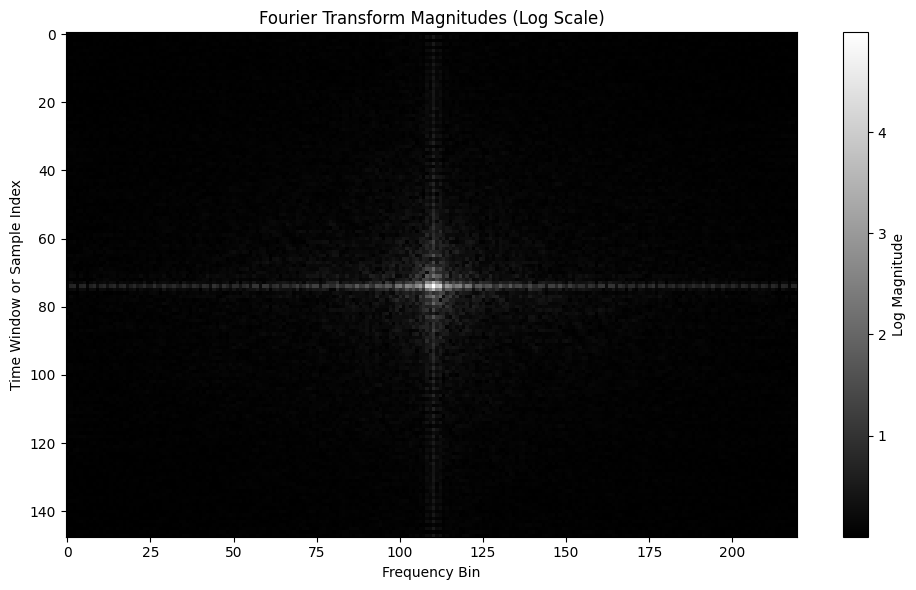

In [91]:
log_points = np.log1p(points)  # log(1 + x) to avoid log(0)

plt.figure(figsize=(10, 6))
plt.imshow(log_points, cmap='gray', aspect='auto')
plt.colorbar(label='Log Magnitude')
plt.title('Fourier Transform Magnitudes (Log Scale)')
plt.xlabel('Frequency Bin')
plt.ylabel('Time Window or Sample Index')
plt.tight_layout()
plt.show()

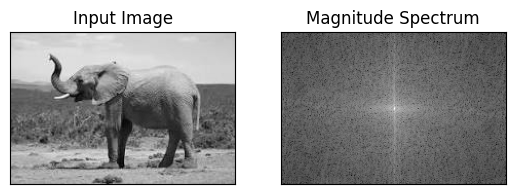

In [ ]:


f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
 
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

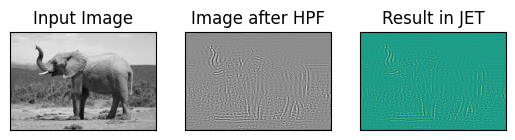

In [4]:
rows, cols = img.shape
crow, ccol = rows//2, cols//2
fshift[crow-30:crow+31, ccol-30:ccol+31] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.real(img_back)
 
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
 
plt.show()